In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [21]:
insurance = pd.read_csv('./data/expenses.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [23]:
insurance.shape

(1338, 7)

In [64]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [65]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

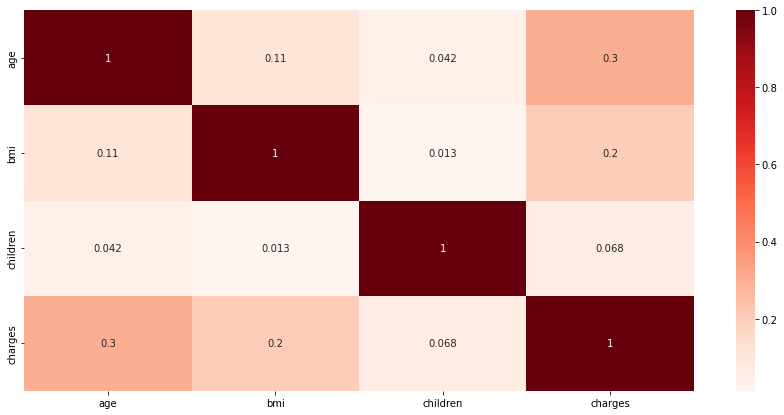

In [144]:
# Correlation Plot

plt.figure(figsize=(15,7))
sns.heatmap(data=insurance.corr(),cmap="Reds", annot=True)

In [24]:
n = len(insurance)
numerator = n * sum(insurance["charges"]*insurance['age']) - sum(insurance["charges"]) * sum(insurance["age"])
denominator = n * sum(insurance["charges"]**2) - sum(insurance["charges"]) ** 2

print(numerator)
print(denominator)
b1_ = numerator / denominator
print(b1_) #intercept

91010239079.4524
262347308458475.62
0.00034690746253208656


In [25]:
# sample mean

b0_ = np.mean(insurance['age']) - b1_ *  np.mean(insurance['charges'])

print(b0_) #slope

34.60341689633183


In [26]:
print('New regression model')

print("age= ", b0_ ,"+",b1_,"* charges")

New regression model
age=  34.60341689633183 + 0.00034690746253208656 * charges


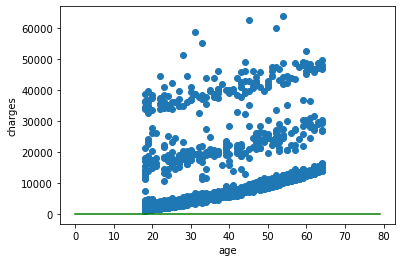

In [27]:
plt.scatter(x='age',y='charges',data=insurance)

plt.xlabel("age")
plt.ylabel("charges")

x= np.arange(0,80)

plt.plot(x , b0_ +  b1_* x, color="green")

In [28]:
result = smf.ols(formula="charges ~ age", data=insurance).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           4.89e-29
Time:                        18:30:52   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.0

In [29]:
result.params

Intercept    3165.885006
age           257.722619
dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression

In [107]:
X=insurance.drop(['charges', 'region', 'smoker', 'sex'], axis=1)
y=insurance['charges']

In [108]:
X

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [109]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [143]:
# Split data to train set and step set

from sklearn.model_selection import train_test_split

#data = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (1003, 3)
X_test shape: (335, 3)
y_train shape: (1003,)
y_test shape: (335,)


In [111]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [112]:
y_pred = reg.predict(X_test)
y_pred

array([16538.97489322, 15026.86995495, 19795.77709379, ...,
       15701.53571367, 19051.81227475, 12347.97531586])

In [ ]:
# R2

from sklearn.metrics import r2_score

In [113]:
print("R2 score:", (r2_score(y_test, y_pred)))

R2 score: 0.1160950724392451


In [139]:
# MAPE
from sklearn import metrics

MAPE = metrics.mean_absolute_error(y_test, y_pred)
print('MAPE :', MAPE)


MAPE : 9156.363717290444


In [30]:
# Rss

RSS = sum(insurance["charges"] ** 2)
RSS

431701516861.6872

In [31]:
result.ssr

178544029385.2155

In [32]:
# RSE

print(n)
RSE = np.sqrt(RSS/(n-2))
RSE

1338


17975.813692027532

In [33]:
# Accuracy

s = sum((insurance['charges'] - np.mean(insurance['charges'])) ** 2) 
s
print(s)

196074221568.36688


In [34]:
# Standard error for B1 # RSME

StdError_b1_ = RSE / np.sqrt(s)

round(StdError_b1_,3)

0.041